# Nursery - full robustness evaluation

In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings. filterwarnings('ignore')
sns.set_style("whitegrid")

## Horizontal subset attack

In [9]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal = results_horizontal.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_horizontal['misattribution'].loc[-1] = 
 

In [6]:
results_horizontal

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.00,NaN,1.0
1,128.0,1.00,1.0,0.1,0.00,NaN,1.0
2,128.0,1.00,1.0,0.2,0.00,NaN,1.0
3,128.0,1.00,1.0,0.3,0.00,NaN,1.0
4,128.0,1.00,1.0,0.4,0.00,NaN,1.0
...,...,...,...,...,...,...,...
256,64.0,3.33,1.0,0.8,0.00,NaN,0.3
257,64.0,5.00,1.0,0.0,0.00,NaN,0.2
258,64.0,5.00,1.0,0.9,0.71,NaN,0.2
259,64.0,5.00,1.0,0.8,0.03,NaN,0.2


In [10]:
# fill out missing edge datapoints
# fp_len = 64.0
for fingerprint_marks in results_horizontal['%fingerprint_marks'].unique():
    results_horizontal.loc[len(results_horizontal.index)] = [64.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]
# fp_len = 128.0
for fingerprint_marks in results_horizontal['%fingerprint_marks'].unique():
    results_horizontal.loc[len(results_horizontal.index)] = [128.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]

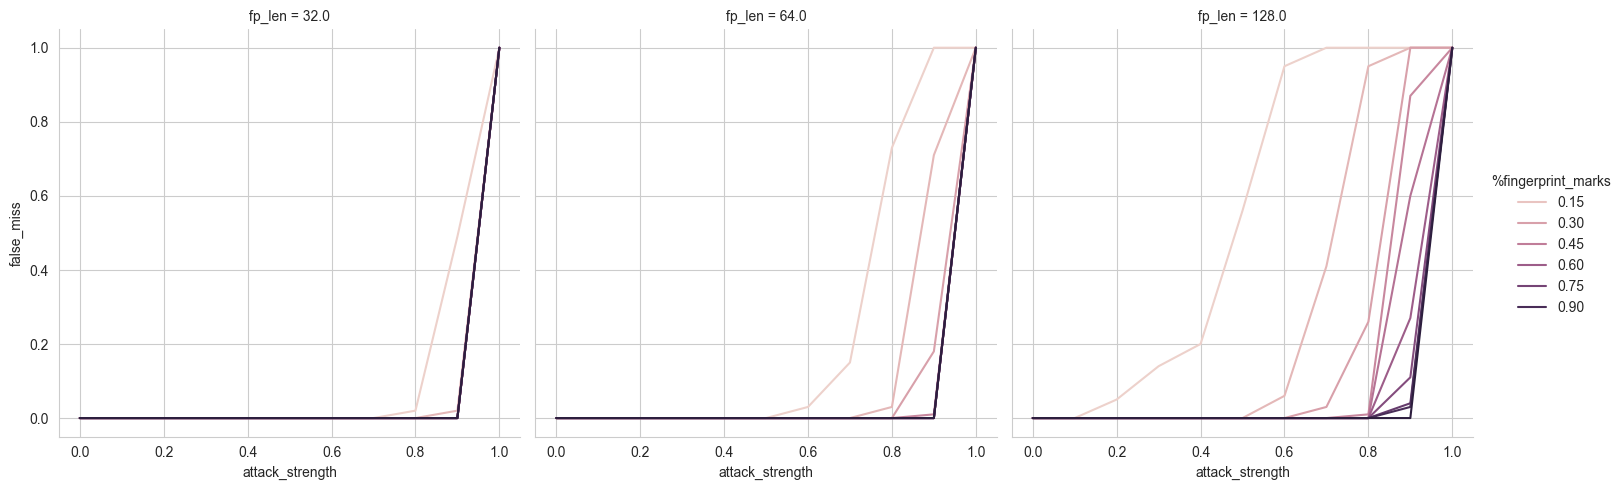

In [11]:
sns.relplot(data=results_horizontal, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_nursery.svg')
plt.savefig('figures/robustness_horizontal_nursery.png')

### Theorietical estimation

In [12]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal_est/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal_est/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal_est = results_horizontal_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

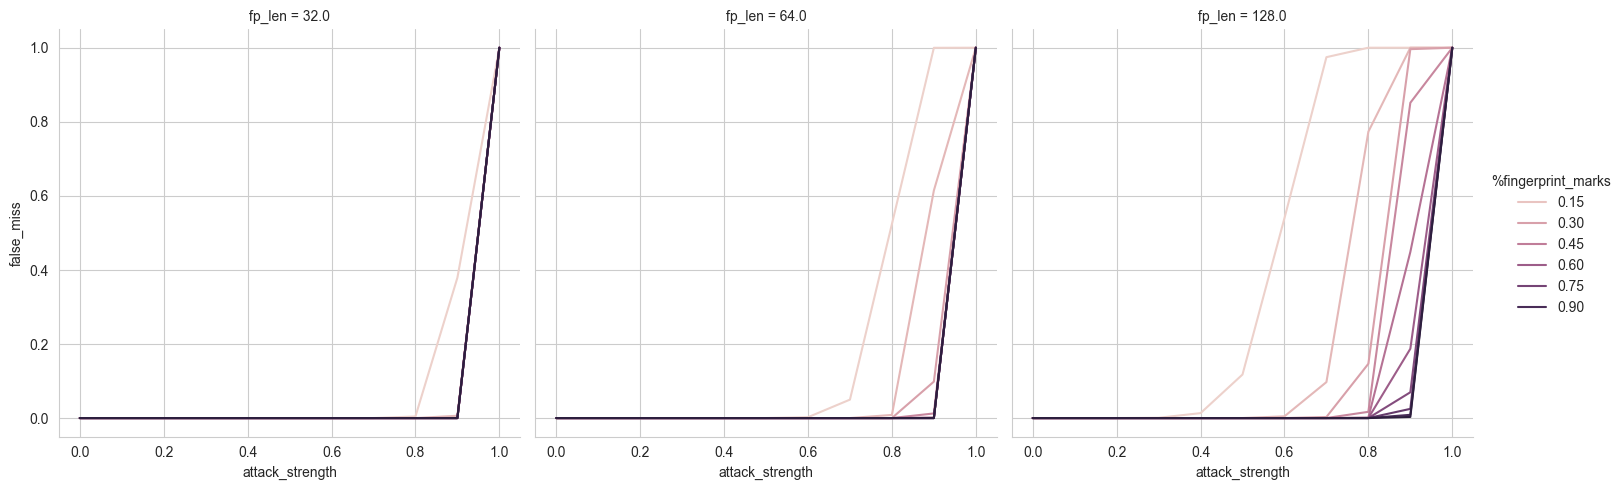

In [13]:
sns.relplot(data=results_horizontal_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison: empirical vs theoretical

In [14]:
results_horizontal['type'] = ['empirical' for i in range(len(results_horizontal))]
results_horizontal_est['type'] = ['theoretical' for i in range(len(results_horizontal_est))]

results_horizontal_comp = pd.concat([results_horizontal, results_horizontal_est])

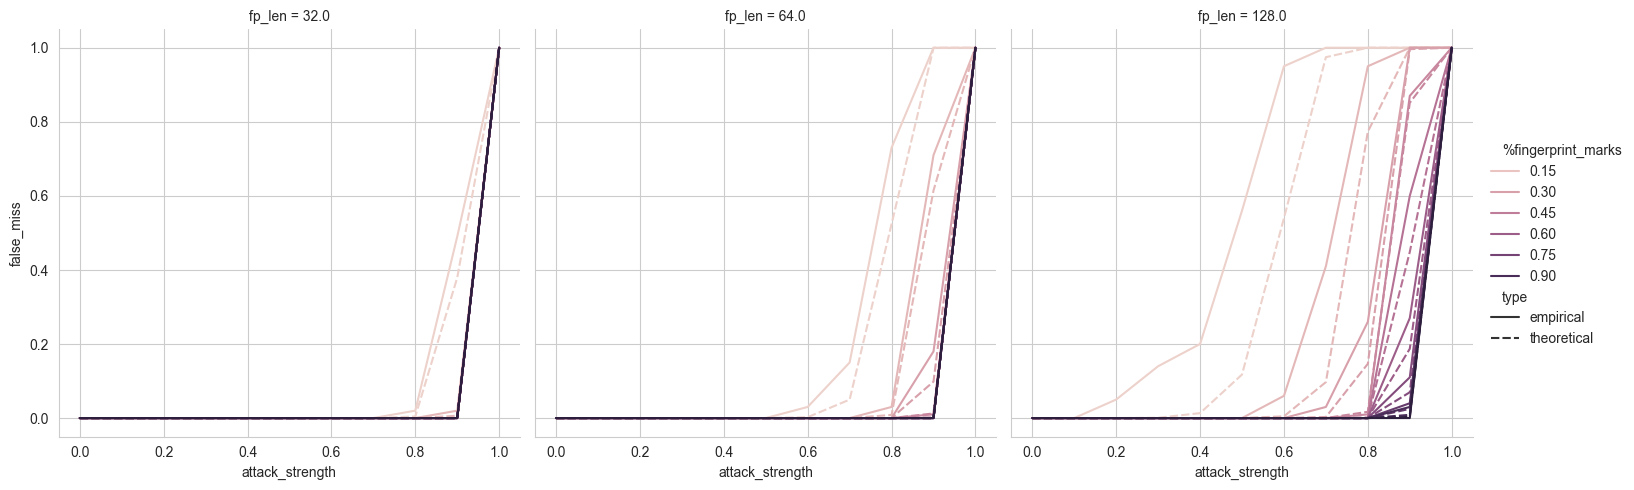

In [15]:
# plot comparison 
sns.relplot(data=results_horizontal_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_horizontal_est_nursery.svg')
plt.savefig('figures/robustness_horizontal_est_nursery.png')

## Vertical attack

In [19]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_vertical = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical = results_vertical.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength_abs': float(key),
                                                    'attack_strength': float(key)/8.0,
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [11]:
results_vertical[results_vertical['fp_len']==32.0]

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks,attack_strength_abs
54,32.0,1.00,1.0,0.000,0.00,NaN,1.0,0.0
55,32.0,1.00,1.0,0.875,0.00,NaN,1.0,7.0
56,32.0,1.11,1.0,0.000,0.00,NaN,0.9,0.0
57,32.0,1.11,1.0,0.875,0.00,NaN,0.9,7.0
58,32.0,1.25,1.0,0.000,0.00,NaN,0.8,0.0
59,32.0,1.25,1.0,0.875,0.00,NaN,0.8,7.0
60,32.0,1.43,1.0,0.000,0.00,NaN,0.7,0.0
61,32.0,1.43,1.0,0.875,0.43,NaN,0.7,7.0
62,32.0,1.43,1.0,0.750,0.00,NaN,0.7,6.0
63,32.0,1.67,1.0,0.000,0.00,NaN,0.6,0.0


In [21]:
# fp_len = 32
for fingerprint_marks in results_vertical['%fingerprint_marks'].unique():
    results_vertical.loc[len(results_vertical.index)] = [32.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks, -1]
# fp_len = 64
for fingerprint_marks in results_vertical['%fingerprint_marks'].unique():
    results_vertical.loc[len(results_vertical.index)] = [64.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks, -1]
# fp_len = 128
for fingerprint_marks in results_vertical['%fingerprint_marks'].unique():
    results_vertical.loc[len(results_vertical.index)] = [128.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks, -1]

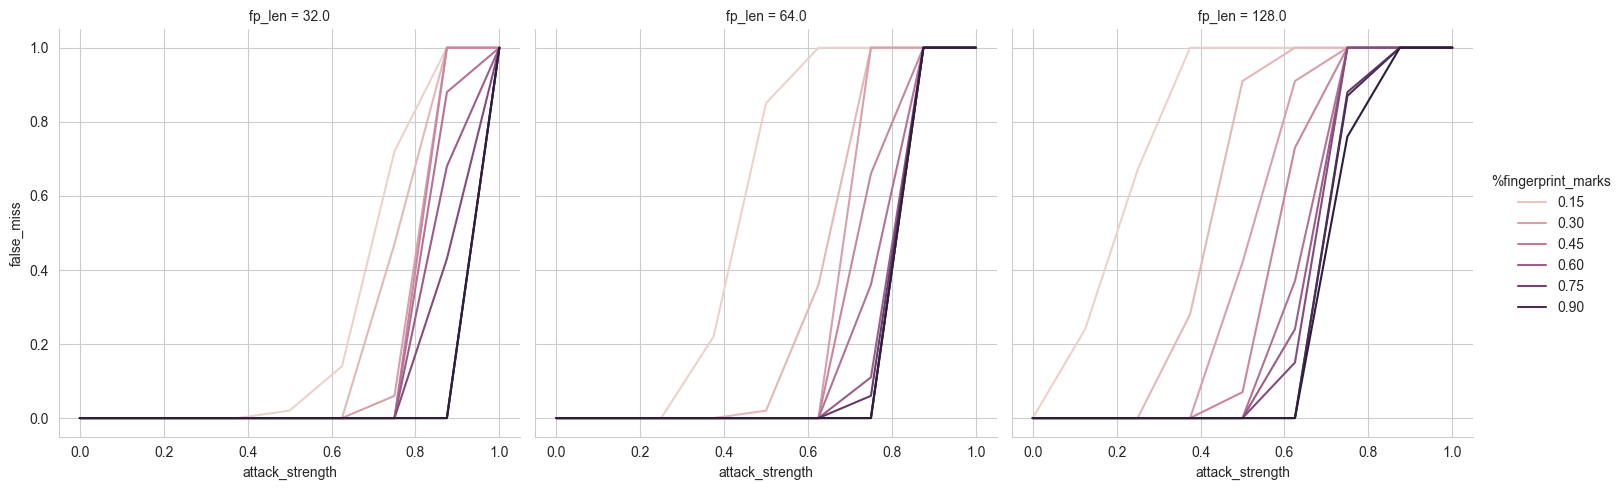

In [22]:
sns.relplot(data=results_vertical, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_vertical_nursery.svg')
plt.savefig('figures/robustness_vertical_nursery.png')

### Theoretical estimation

In [23]:
results_vertical_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical_est/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical_est/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical_est = results_vertical_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

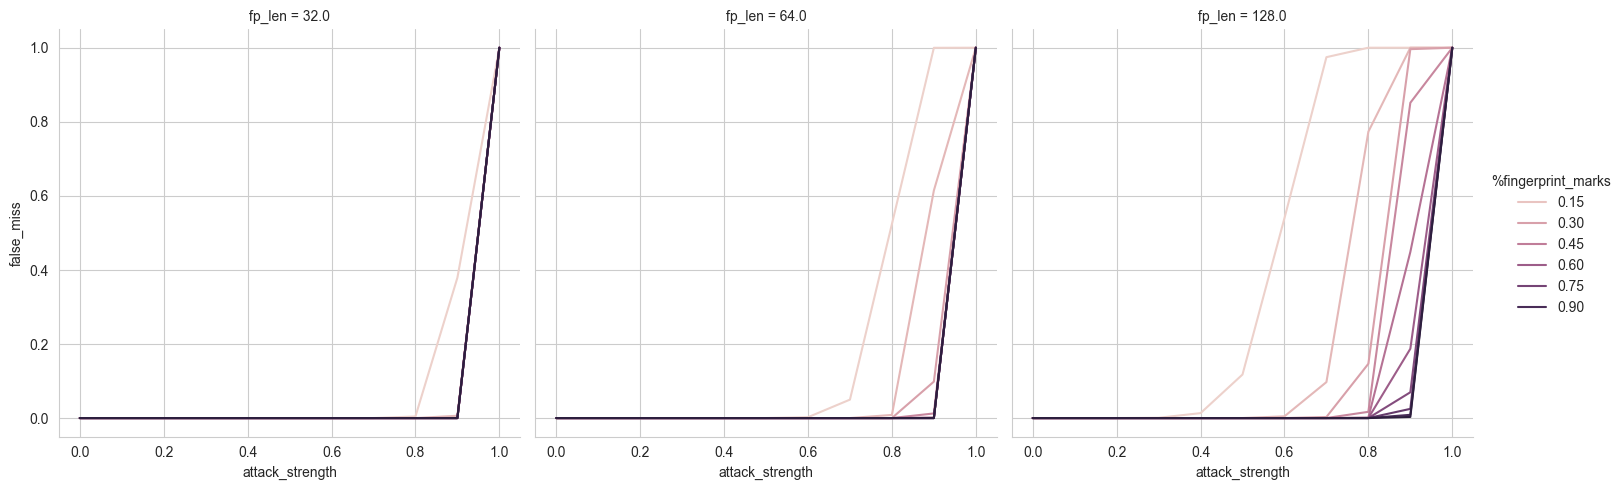

In [24]:
sns.relplot(data=results_vertical_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison empirical vs theoretical

In [25]:
results_vertical['type'] = ['empirical' for i in range(len(results_vertical))]
results_vertical_est['type'] = ['theoretical' for i in range(len(results_vertical_est))]

results_vertical_comp = pd.concat([results_vertical, results_vertical_est])

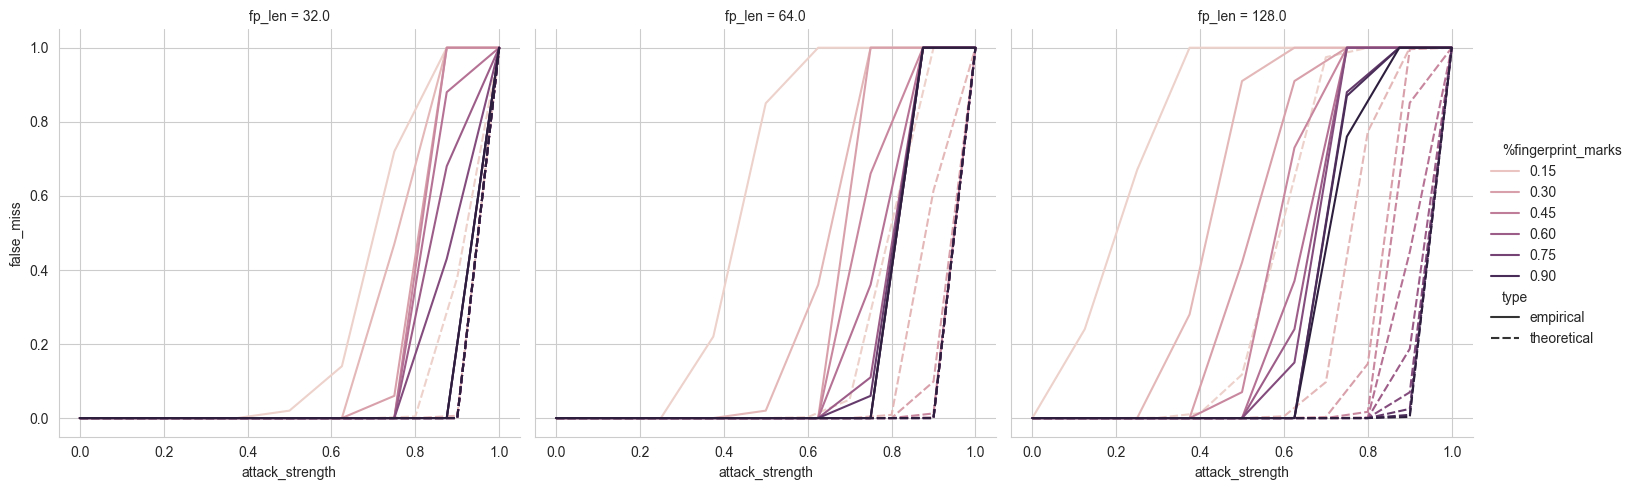

In [26]:
# plot comparison 
sns.relplot(data=results_vertical_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_vertical_est_nursery.svg')
plt.savefig('figures/robustness_vertical_est_nursery.png')

note: I think this estimation is bad because the detection doesn't just skip the missing bits like in horizontal, but rather reads the imputated value of the whole column (due to the implementation specifications). 
e.g. difference between horizontal and fliiping is that in the first case, if data is missing, it's just missing, no count gets increased, wherease in flipping, the wrong count gets updated.

## Flipping attack

In [27]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_flipping = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping = results_flipping.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [28]:
results_flipping

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.00,NaN,1.0
1,128.0,1.00,1.0,0.6,0.08,NaN,1.0
2,128.0,1.00,1.0,0.5,0.00,NaN,1.0
3,128.0,1.11,1.0,0.0,0.00,NaN,0.9
4,128.0,1.11,1.0,0.6,0.11,NaN,0.9
...,...,...,...,...,...,...,...
87,64.0,10.00,1.0,0.5,0.97,NaN,0.1
88,64.0,10.00,1.0,0.4,0.57,NaN,0.1
89,64.0,10.00,1.0,0.3,0.18,NaN,0.1
90,64.0,10.00,1.0,0.2,0.03,NaN,0.1


In [29]:
# fp_len = 32
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [32.0, -1, 1.0, 0.7, 1.0, '' , fingerprint_marks]

In [31]:
# fp_len = 64
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [64.0, -1, 1.0, 0.7, 1.0, '' , fingerprint_marks]
# fp_len = 128
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [128.0, -1, 1.0, 0.7, 1.0, '' , fingerprint_marks]

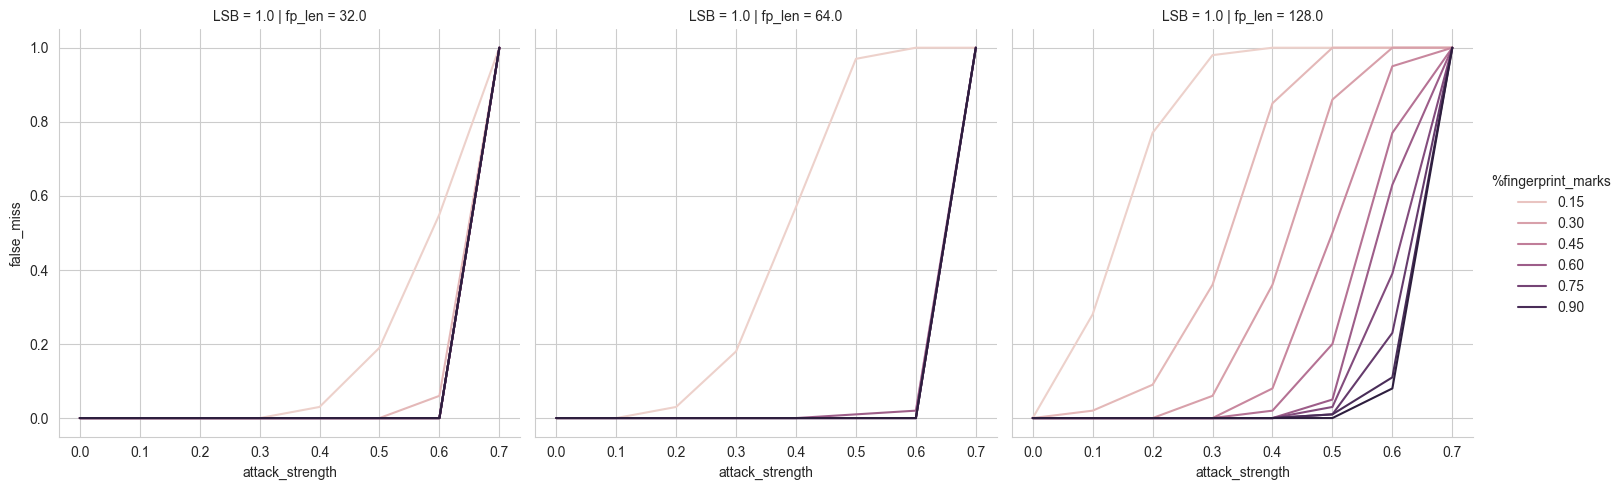

In [32]:
sns.relplot(data=results_flipping, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='LSB')
plt.savefig('figures/robustness_flipping_nursery.svg')
plt.savefig('figures/robustness_flipping_nursery.png')

### Comparison to theoretical estimate

In [33]:
results_flipping_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping_est/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping_est/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping_est = results_flipping_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              'xi': xi,
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 


In [34]:
results_flipping['type'] = ['empirical' for i in range(len(results_flipping))]
results_flipping_est['type'] = ['theoretical' for i in range(len(results_flipping_est))]

results_flipping_comp = pd.concat([results_flipping, results_flipping_est])

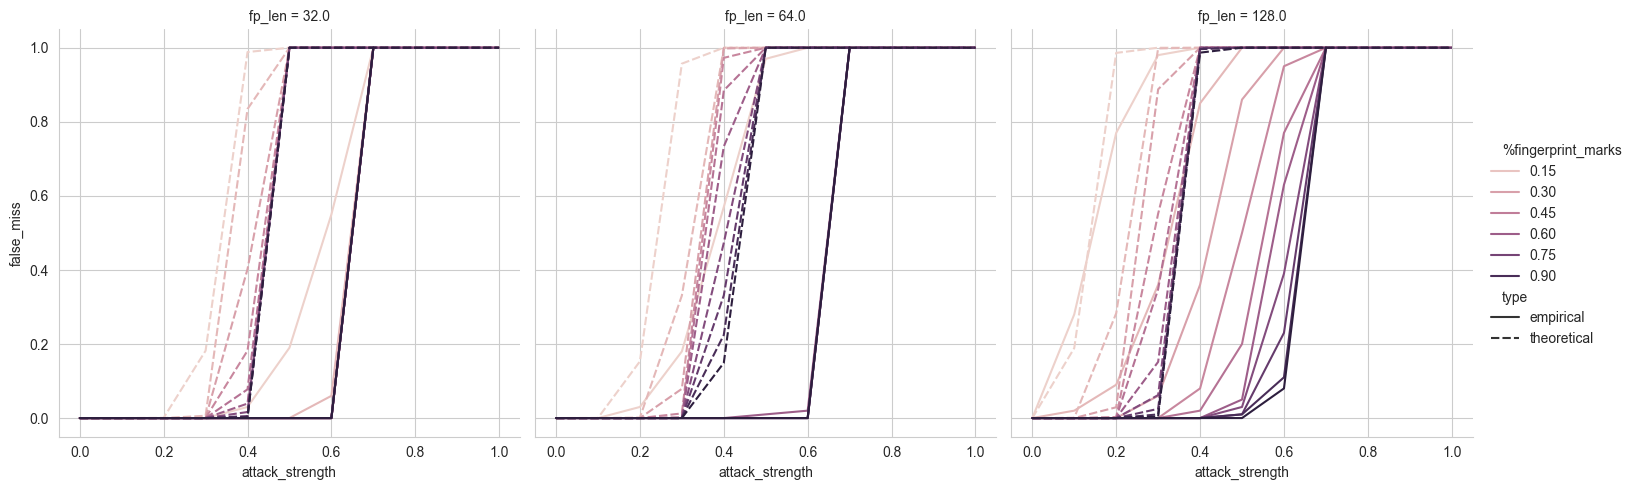

In [35]:
# plot comparison 
sns.relplot(data=results_flipping_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_flipping_est_nursery.svg')
plt.savefig('figures/robustness_flipping_est_nursery.png')

## Rounding attack

In [19]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/rounding/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/rounding/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [20]:
results_frame

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.0,NaN,1.0
1,128.0,1.00,1.0,0.9,0.0,NaN,1.0
2,128.0,1.25,1.0,0.0,0.0,NaN,0.8
3,128.0,1.25,1.0,0.9,0.0,NaN,0.8
4,128.0,1.43,1.0,0.0,0.0,NaN,0.7
5,128.0,1.43,1.0,0.9,0.0,NaN,0.7
6,128.0,1.67,1.0,0.0,0.0,NaN,0.6
7,128.0,1.67,1.0,0.9,0.0,NaN,0.6
8,128.0,10.00,1.0,0.0,0.0,NaN,0.1
9,128.0,10.00,1.0,0.9,0.0,NaN,0.1


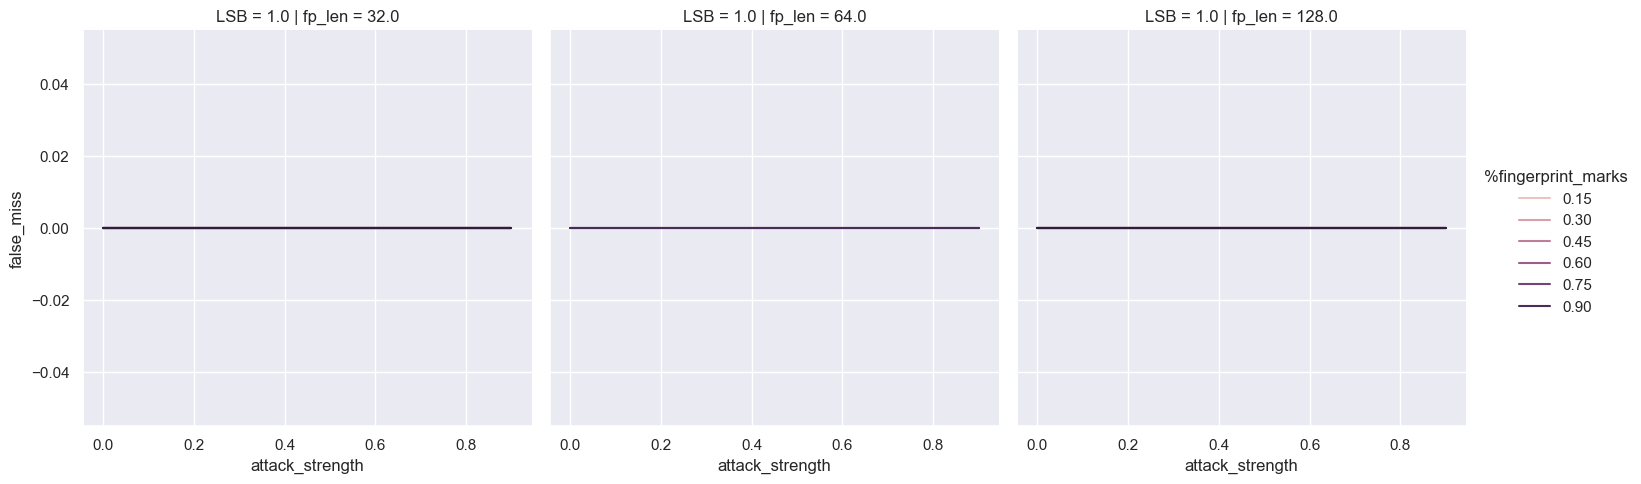

In [21]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='LSB')

## Superset

In [36]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [23]:
results_frame

,fp_len,gamma,xi,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.0,1.0,0.0,0.00,NaN,1.0
1,128.0,1.0,1.0,0.9,1.00,NaN,1.0
2,128.0,1.0,1.0,0.8,0.97,NaN,1.0
3,128.0,1.0,1.0,0.7,0.15,NaN,1.0
4,128.0,1.0,1.0,0.6,0.00,NaN,1.0
...,...,...,...,...,...,...,...
168,64.0,5.0,1.0,0.7,0.91,NaN,0.2
169,64.0,5.0,1.0,0.6,0.36,NaN,0.2
170,64.0,5.0,1.0,0.5,0.03,NaN,0.2
171,64.0,5.0,1.0,0.4,0.01,NaN,0.2


In [37]:
# fp_len = 32
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [32.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]
# fp_len = 64
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [64.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]
# fp_len = 128
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [128.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]

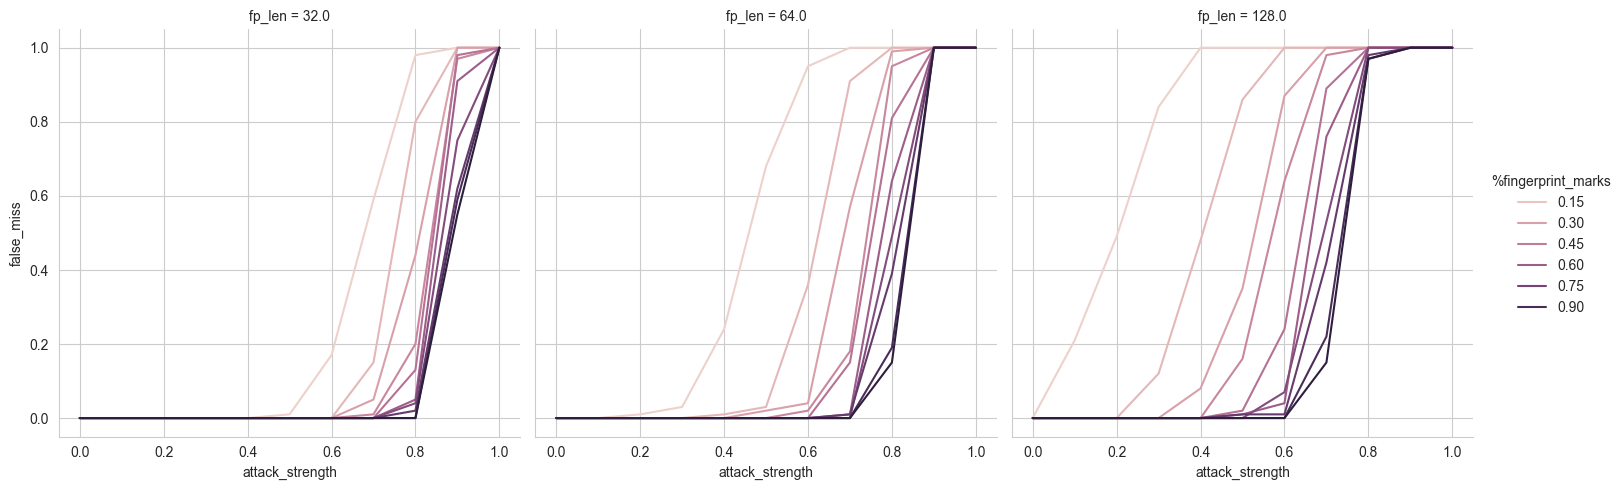

In [38]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_superset_nursery.svg')
plt.savefig('figures/robustness_superset_nursery.png')

## Combination attack
Superset attack (horizontal subset + synthetic imputation) + flipping attack

In [5]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/combination/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/combination/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


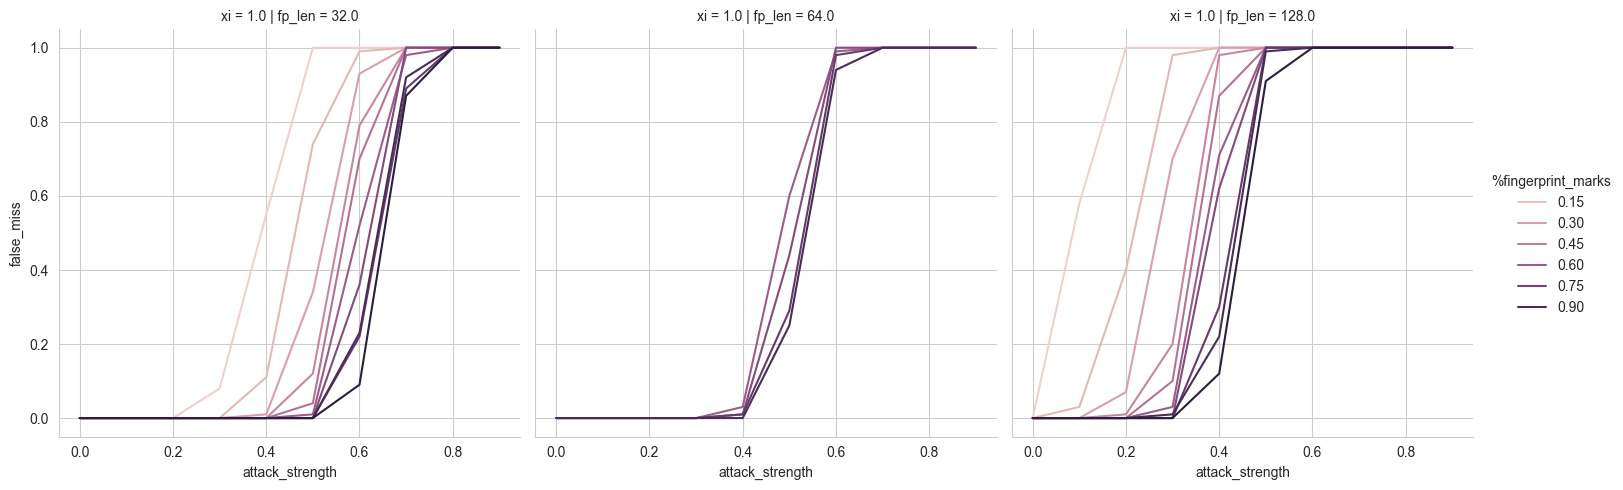

In [6]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_combination_nursery.svg')
plt.savefig('figures/robustness_combination_nursery.png')